# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
from plotnine import *
from numpy import *
from pandas import *

In [3]:
# Import the titanic dataset
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [6]:
#Set passenger column
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_passenger = df_titanic[df_titanic["type"]=="passenger"]

crosstab(df_passenger["class"], df_passenger["embarked"])


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution calculated above, calculate the following:

1.  the conditional distribution of their class given where they embarked
2. the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

3. What proportion of 3rd class passengers embarked at Southampton?

4. What proportion of Southampton passengers were in 3rd class?



In [7]:
crosstab(df_passenger["class"], df_passenger["embarked"], normalize=True)

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


In [8]:
crosstab(df_passenger["embarked"], df_passenger["class"], normalize=True)

class,1st,2nd,3rd
embarked,,,
B,0.002278,0.004556,0.000000
C,0.108580,0.019742,0.077449
Q,0.002278,0.005315,0.085801
S,0.132878,0.186029,0.375095


3.  Southampton 3rd class/ Total 3rd class = .375095/(0+.077449+.085801+.375095) = .69676,
    69.68% of 3rd class passengers embarked at Southampton.
4. 3rd class Southampton/Total Southampton = .375095/(.132878+.186029+.375095) = .54048, 
  54.40% of Southampton passengers were in 3rd class.

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

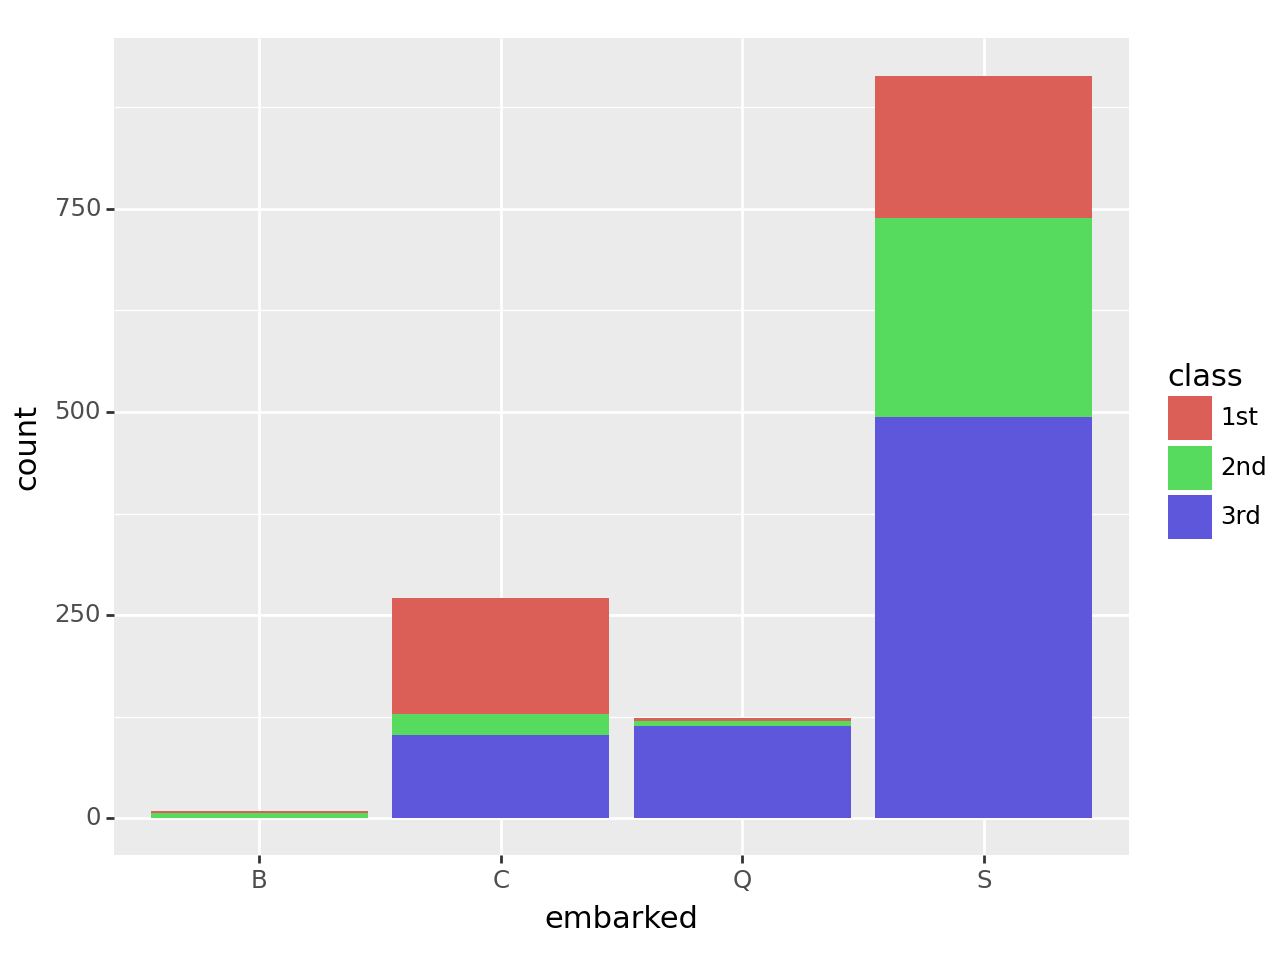

<Figure Size: (640 x 480)>

In [28]:
plot2 = ggplot(df_passenger, aes("embarked",fill = "class",)) + geom_bar()
plot2

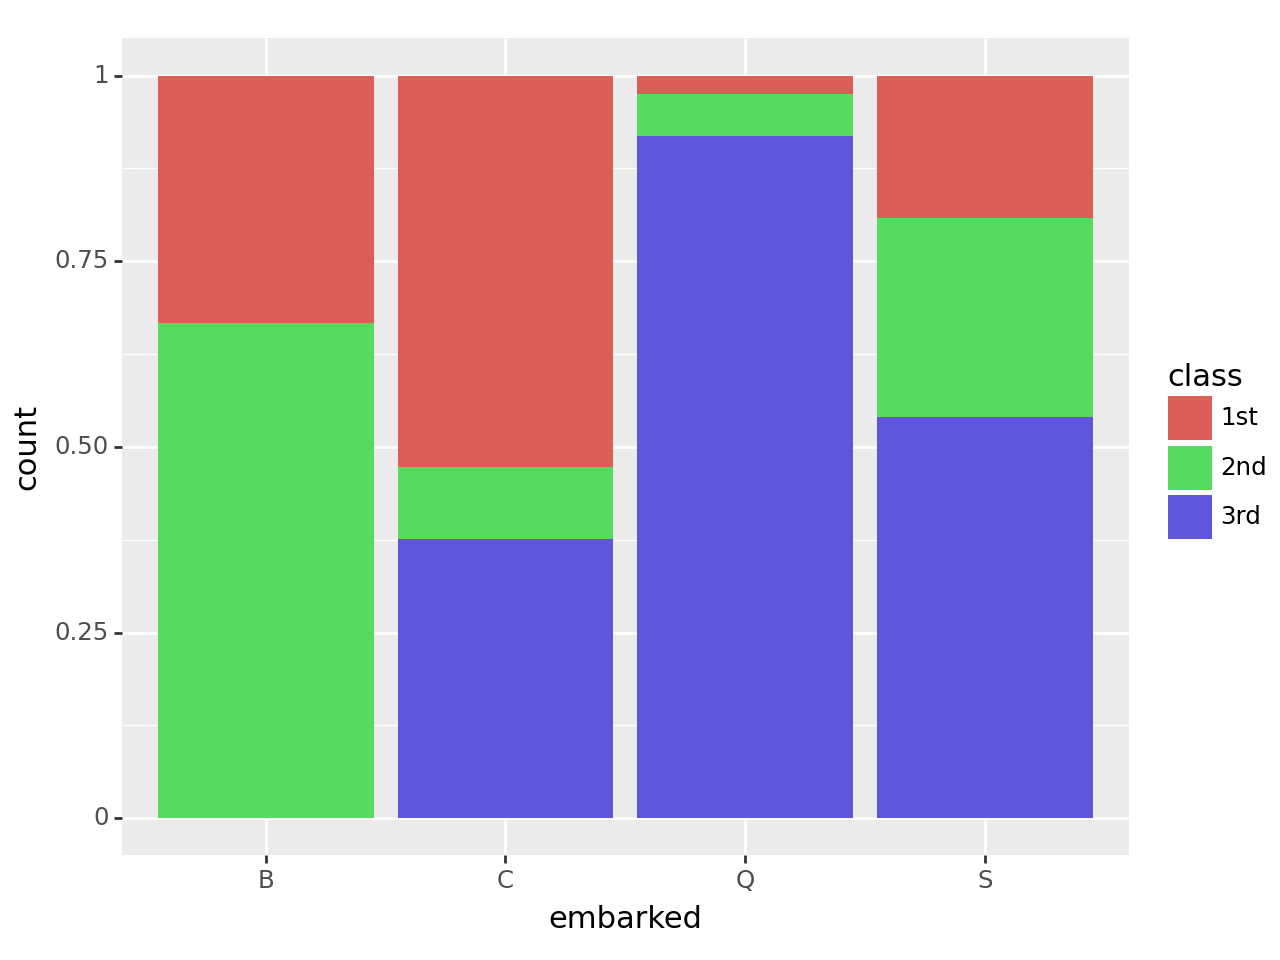

<Figure Size: (640 x 480)>

In [27]:
plot2 = ggplot(df_passenger, aes("embarked",fill = "class",)) + geom_bar(position = "fill")
plot2

The benefits of using these visualizations is that they give you a better picture of the distributions of a passenger's class given where they embarked, as pictures are easier to understand. The tables created above give exact valeus for numbers if needed for further calculation, which these visualizations do not provide.